In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import numpy as np

/var/folders/k6/79gt8yds1l3gsjyykhx8fr4r0000gn/T/ipykernel_1913/999247128.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['price'], bins=100)


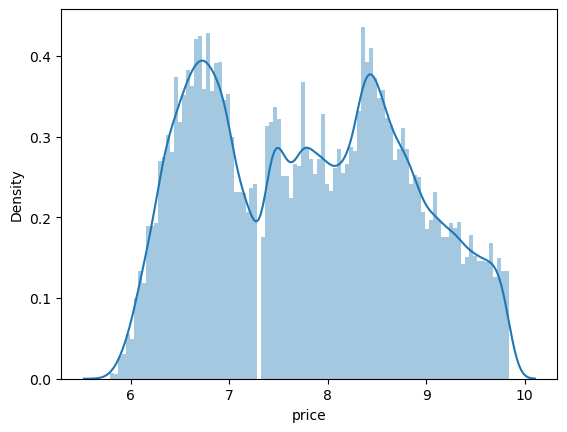

In [ ]:
# Load training data
train_df = pd.read_csv('./Data/training_data.csv')
test_df = pd.read_csv('./Data/testing_data.csv')

log_data = True

train_df.head()

In [ ]:
sns.distplot(train_df['price'], bins=100)
plt.show()

/var/folders/k6/79gt8yds1l3gsjyykhx8fr4r0000gn/T/ipykernel_1913/3471631671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['x'], ax=ax[0])
/var/folders/k6/79gt8yds1l3gsjyykhx8fr4r0000gn/T/ipykernel_1913/3471631671.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['y'], ax

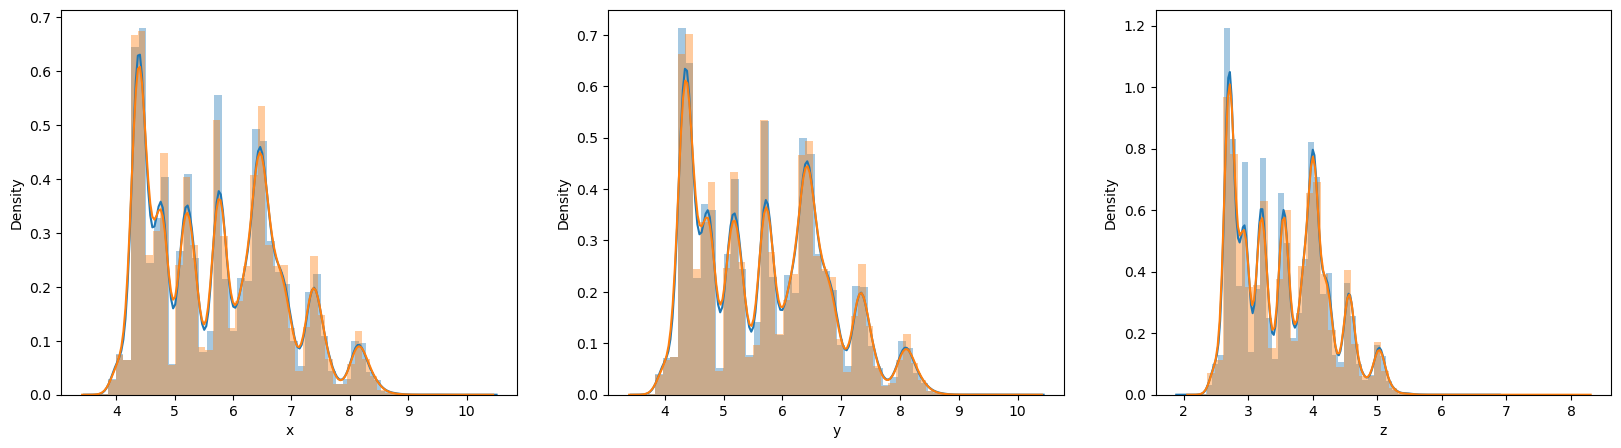

In [67]:
# Plot histogram of test data and train data on x, y, an z
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.distplot(train_df['x'], ax=ax[0])
sns.distplot(train_df['y'], ax=ax[1])
sns.distplot(train_df['z'], ax=ax[2])

sns.distplot(test_df['x'], ax=ax[0])
sns.distplot(test_df['y'], ax=ax[1])
sns.distplot(test_df['z'], ax=ax[2])

plt.show()

<Axes: xlabel='aspect_ratio_carat', ylabel='price'>

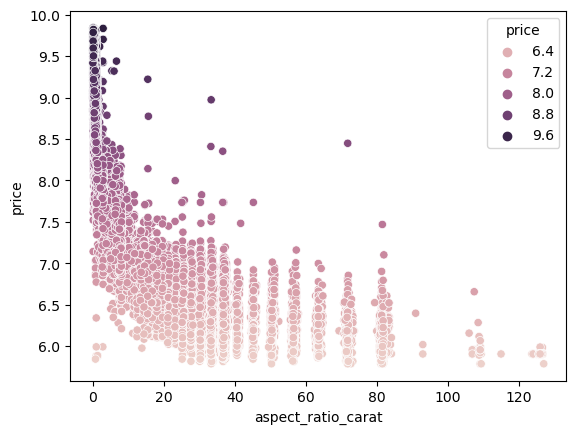

In [68]:
# Make a scatter plot of aspect ratio vs price
sns.scatterplot(data=train_df, x='aspect_ratio_carat', y='price', hue='price')

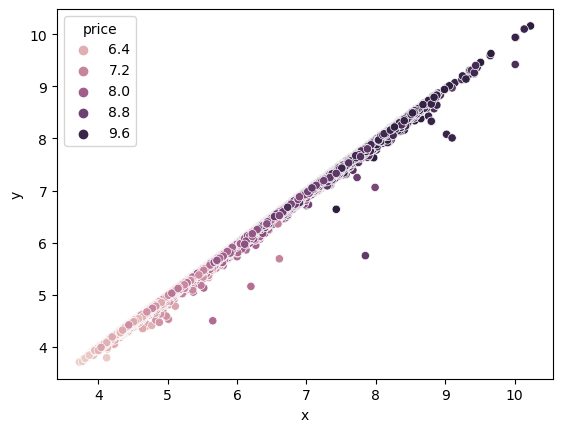

In [70]:
# plot x vs new_x
sns.scatterplot(data=train_df, x='x', y='y', hue='price')
plt.show()

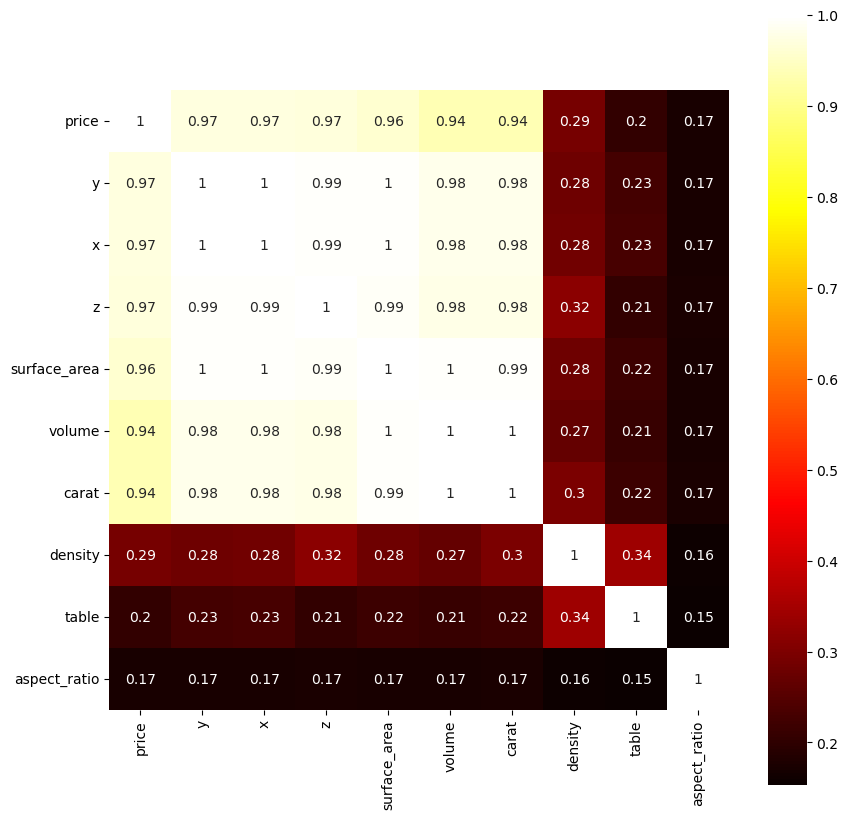

In [71]:
train_df_copy = train_df.copy()
train_df_copy['price'] = train_df['price']

correlation_matrix = train_df_copy.corr()

# Get columns of top 10 most correlated parameters
cols = correlation_matrix.nlargest(10, ['price'])['price'].index

# Compute pearson correlation coefficient
cm = np.corrcoef(train_df_copy[cols].values.T)

# Plot heat map
plt.figure(figsize=(10,10))
sns.heatmap(cm, cmap='hot', cbar=True, square=True, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [72]:
# Various hyper-parameters to tune
reg = XGBRegressor(n_estimators=1500, 
                   max_depth=5, 
                   learning_rate = 0.02, 
                   min_child_weight= 4,
                   subsample = 0.7,
                   objective='reg:squarederror',
                   eval_metric='rmse',
                   )

In [73]:
train_y = train_df_copy['price']
train_X = train_df_copy.drop(columns=['price'])

# We also want to split data for evaluation
train_X_s, test_X, train_y_s, test_y = train_test_split(train_X, train_y, test_size=0.1)

# Fit model
reg.fit(train_X, train_y, eval_set = [(train_X_s, train_y_s), (test_X, test_y)], verbose=100)

[0]	validation_0-rmse:7.21405	validation_1-rmse:7.21559
[100]	validation_0-rmse:0.96721	validation_1-rmse:0.96837
[200]	validation_0-rmse:0.17133	validation_1-rmse:0.17196
[300]	validation_0-rmse:0.10782	validation_1-rmse:0.10796
[400]	validation_0-rmse:0.10402	validation_1-rmse:0.10401
[500]	validation_0-rmse:0.10287	validation_1-rmse:0.10282
[600]	validation_0-rmse:0.10223	validation_1-rmse:0.10216
[700]	validation_0-rmse:0.10175	validation_1-rmse:0.10166
[800]	validation_0-rmse:0.10141	validation_1-rmse:0.10133
[900]	validation_0-rmse:0.10110	validation_1-rmse:0.10102
[1000]	validation_0-rmse:0.10083	validation_1-rmse:0.10077
[1100]	validation_0-rmse:0.10059	validation_1-rmse:0.10053


In [54]:
print("RMSE : %.4g" % np.sqrt(mean_squared_error(train_y, reg.predict(train_X))))

RMSE : 0.09982


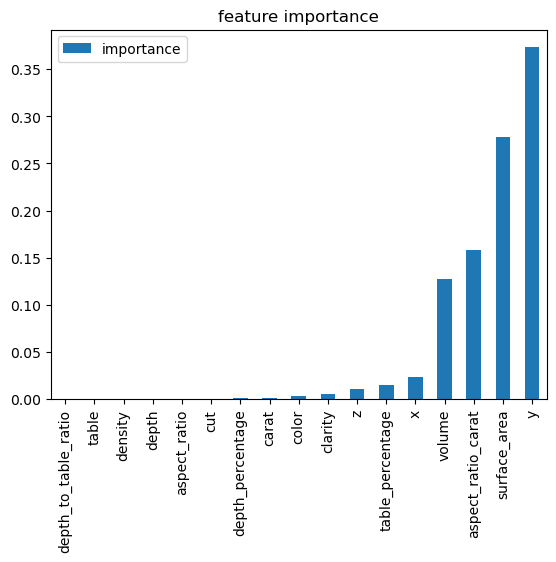

In [55]:
# Let's look at the feature importances
fi = pd.DataFrame(data=reg.feature_importances_,
                  index=reg.feature_names_in_,
                  columns=['importance'])

fi.sort_values('importance').plot(kind='bar', title='feature importance')
plt.show()

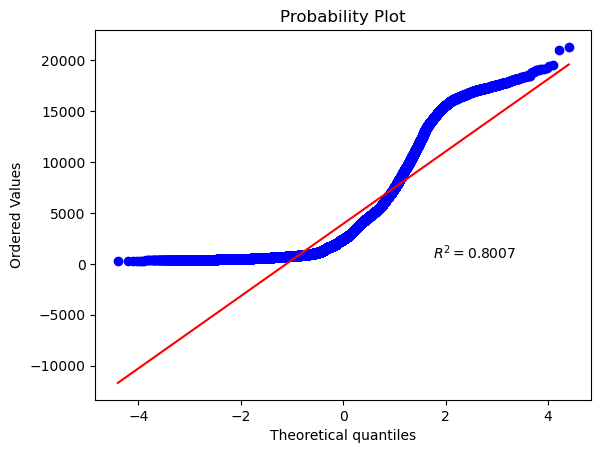

In [56]:
# Now make predictions 
test_y = reg.predict(test_df)

# Let's take a look this data
stats.probplot(np.exp(test_y), plot=plt, rvalue=True)

plt.show()

/var/folders/k6/79gt8yds1l3gsjyykhx8fr4r0000gn/T/ipykernel_1913/2280142254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_y, label='train')
/var/folders/k6/79gt8yds1l3gsjyykhx8fr4r0000gn/T/ipykernel_1913/2280142254.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_y, label='tes

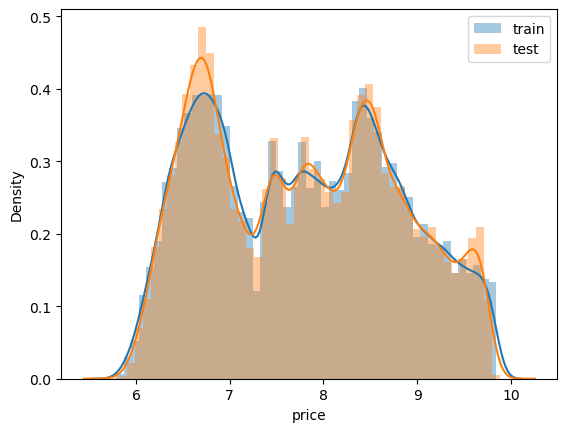

In [57]:
# Make a distplot of the train prices and the predicted prices
sns.distplot(train_y, label='train')
sns.distplot(test_y, label='test')
plt.legend()
plt.show()

In [31]:
# Load submission df to replace
submission_df = pd.read_csv('./Data/sample_submission.csv', index_col='id')

# Take exponential of log data
if log_data:
    test_y = np.exp(test_y)
    submission_df['price'] = test_y
else:
    submission_df['price'] = test_y

# create submission
submission_df.to_csv('./Data/submission_xgboost_2.csv')